In [1]:
!pip install seaborn
# seaborn?? diamond?? -> matplot보다 깔끔하다고 함.. 근데 왜 난 한 기억이 없지..


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import seaborn as sns
import pandas as pd

# 기본 데이터셋 목록 조회
sns.get_dataset_names()

df_titanic = sns.load_dataset('titanic')

df_titanic #pandas.core.frame.DataFrame

# 데이터 분석 5단계
# 1. 문제 정의
# 2. 데이터 수집
# 3. 데이터 전처리 : 결측치 처리, 중복값 처리, 중복값의 유효성,  분석하기 편한 구조로 데이터 가공
# 4. 데이터 모델링 : 전처리가 끝난 데이터를 목적에 맞게 분류한다. (데이터 쪼개기)
# 5. 시각화 및 결론 도출

# 나이팅게일? 나이팅게일 시각화?

# 데이터 전처리 단계
# 1. 각 컬럼이 무엇을 의미하고 어떻게 데이터를 표현하는지, 결측값/중복값이 있는지 등등을 파악한다.
# 2. 결측값/중복값 등 문제가 있는 데이터를 적절히 처리
# 3. 분석하기 좋은 구조로 변경

# 각 컬럼별 설명
# survived(생존여부_숫자): 0 사망 / 1 생존
# pclass(좌석 등급_숫자): 1/2/3 (df_titanic['pclass'].unique() # unique() 함수: pclass 가 가지고있는 고유한 값 표현)
# sex(성별): male / female
# age(나이): 0.0 ~ 80.0 (max값 확인하는 코드: df_titanic['age'].max() )
# sibcp(형재자매, 배우자 인원 수): 0 ~ 8
# parch(부모, 자식 인원 수) : 0 ~ 6
# fare(요금): 0.0 ~ 512.3292
# embarked(탑승 항구_앞글자): S / C / Q
# deck(선실 번호 앞자리 알파벳) : A ~ F

# 상위 데이터 확인
df_titanic.head()

df_titanic.info()

# age는 891개의 데이터 중 714개의 데이터가 유효하다.
# deck는 891개의 데이터 중 203개의 데이터가 유효하다.

# 유효 데이터 카운트
df_titanic['deck'].count()

# 데이터 별 상세 카운트
df_titanic['deck'].value_counts()
df_titanic['deck'].value_counts(dropna = False)

# 널 값 확인 : isnull(), isna() 함수 - 데이터가 누락되었는지를 T/F로 나타낸다 (결측치)
df_titanic.isnull()
df_titanic.isna()

# notnull(), notna() : 데이터가 유효한지 T/F 로 나타낸다.
df_titanic.notnull()

df_titanic.isna().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [17]:
# 결측치 처리: null, none, na, nan, ?(물음표로 나오는 값은 numpy로 처리하면 편함)
# 결측치가 발생하는 원인: 데이터를 수집하는 과정에서 누락

# deck의 결측치를 처리해보자

# 우리가 판단을 했을 때, 탑승객의 선실 위치는 생존 여부에 중요한 영향을 끼치는 값이지만
# 총 행이 891개인데, 이 중 절방 이상이 deck 칼럼은 분석에 의미가 없으며, 
# 오히려 분석을 방해하는 요인이 될 수 있다.

# 그렇다면 이 칼럼은 어떻게 처리할지 정해야 한다.
# 결측치 처리 기법 대표적인 2가지

# 1. 결측치 제거
#   컬럼을 통채로 삭제하거나 결측값만 제외시키고 분석하는 방식
#   이 방식이 일반적이고, 이는 대부분의 상황에서 좋은 선택이 될 수 있다.
# 2. 켤측치를 임의의 값으로 대체한다. (평균값, 중앙값, 최빈값 등)
#   간편하게 처리할 수 있다는 장점이 있다.
#   결측치가 많지 않으면 고려할 수 있으나, 만약 해당 값이 다른 컬럼에 영향을 준다면 
#   인위적으로 채운 값 때문에 분석 결과에 영향을 줄 수 있다는 위험이 있다.

# 우리는 deck 컬럼을 삭제하기로 한다 (deck는 결측치가 너무 많다.)

# 1개의 컬럼만 삭제하고 해당 컬럼이 무엇인지 안다면 drop()을 사용한다.
# df_titanic.drop('deck', axis=1)

# thresh=400 은 컬럼의 결측치가 400개 이상인 컬럼을 의미한다.
df_drop_deck = df_titanic.dropna(axis=1, thresh=400) # 결측치가 400개 이상인 컬럼을 삭제해라

df_drop_deck

df_drop_deck.columns

'deck' in df_drop_deck.columns # 아무것도 안나오면 deck라는 컬럼 없는 것

# 나이 컬럼 처리
len(df_drop_deck)
df_drop_deck.isna().sum()
# 'age' 컬럼: 891행 중 177개의 결측치

# 평균값 또는 중앙값으로 채워 넣는다.

# 나이의 평균값 구하기
ave_age = df_drop_deck['age'].mean()

# 나이의 중앙값 구하기
df_drop_deck['age'].median()


df_drop_deck['age'] = df_drop_deck['age'].fillna(ave_age) # 여기에 inplace 옵션도 사용 가능

df_drop_deck.isna().sum()



0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [44]:
# 결측치 처리 (탑승 항구)
# 이 셀 해결 안됨.. 결과가 결측치에 최빈값이 들어가야하는데 안들어감..

df_drop_deck['embarked']
df_drop_deck['embark_town']


# "최빈값" 반환하는 함수: mode() 
mode_emb = df_drop_deck['embarked'].mode() 
mode_town = df_drop_deck['embark_town'].mode() 

# type(mode_emb)  # pandas.core.series.Series
# type(mode_town) # pandas.core.series.Series
#print("???", mode_emb[0])

df_drop_deck['embarked'].fillna(mode_emb[0], inplace=True)
df_drop_deck['embark_town'].fillna(mode_emb[0], inplace=True)

df_drop_deck.isna().sum()

df_result = df_drop_deck

df_result

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13708\3226931369.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop_deck['embarked'].fillna(mode_emb[0], inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_13708\3226931369.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop_deck['embark_town'].fillna(mode_emb[0], inplace=True)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [34]:
# 중복데이터 확인하기
# duplicated()는 이전 행과 일치하는지 검사하여 T/F를 반환한다.
# 시리즈를 반환한다.
s_dup = df_result.duplicated()
type(s_dup)     # pandas.core.series.Series

pandas.core.series.Series

In [42]:
list_bool=[True, False, True, False]

df_tmp = df_result.head(4)
df_tmp[list_bool] # list_bool 중 TRUE인 아이의 index에 해당하는 df_tmp데이터 프레임이 가지고 있는 행만 가져온다.

df_result[s_dup]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
47,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,Queenstown,yes,True
76,0,3,male,NaN,0,0,7.8958,S,Third,man,True,Southampton,no,True
77,0,3,male,NaN,0,0,8.0500,S,Third,man,True,Southampton,no,True
87,0,3,male,NaN,0,0,8.0500,S,Third,man,True,Southampton,no,True
95,0,3,male,NaN,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S,Third,man,True,Southampton,no,True
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,Southampton,no,True


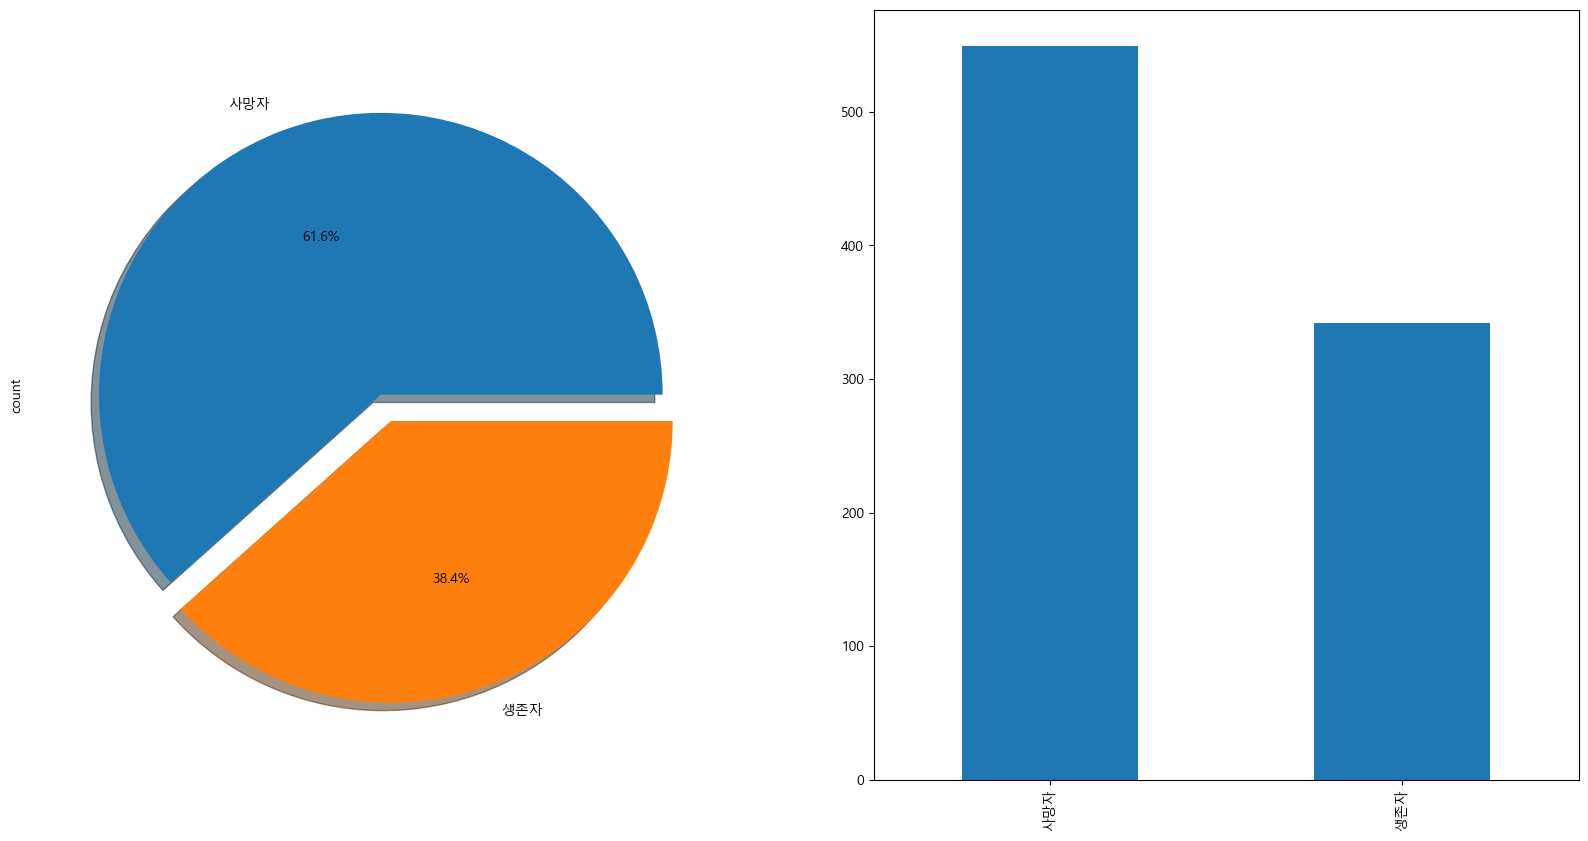

In [58]:
# 데이터 모델링과 시각화
# 0. 전체 생존률
# 1. 성별과 생존률
# 2. 나이와 생존률
# 3. 좌석등급과 생존률
# 4. 가족 유무와 생존률

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 0. 전체 생존률
# 필요한 데이터만 추출/분리
s_survived = df_result['survived'].value_counts() # 시리즈 객체

# 인덱스 수정
s_survived.index = ['사망자', '생존자']
s_survived

# 시각화
# 기존방식
#fig = plt.figure(figsize = (20, 10))
#ax1 = fig.add_subplot(121)
#ax2 = fig.add_subplot(122)

#s_survived.plot(kind='pie', ax=ax1, autopct='%.1f%%')


# 모던한 방식
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

s_survived.plot.pie(autopct = '%.1f%%', ax=ax[0], explode=[0, 0.1], shadow=True)
s_survived.plot.bar(ax=ax[1])

plt.show()


<Axes: xlabel='생존 여부', ylabel='survived'>

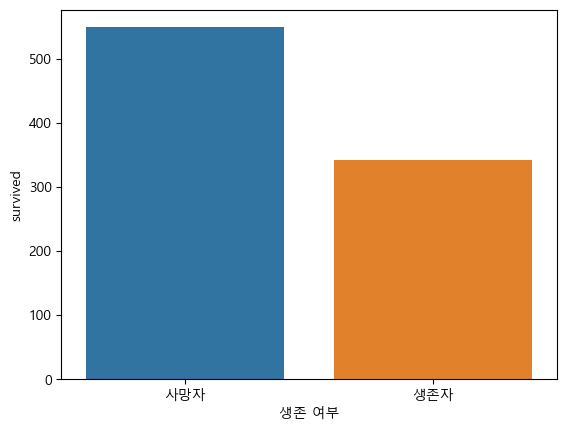

In [70]:
df_survived = pd.DataFrame(s_survived)

df_survived

df_survived = df_survived.reset_index().rename(columns={'index':'생존 여부', 'count':'survived'})
df_survived

sns.barplot(data = df_survived, x='생존 여부', y='survived') #bar chart에서는 hue 안써도 된다.

<Axes: xlabel='survived', ylabel='count'>

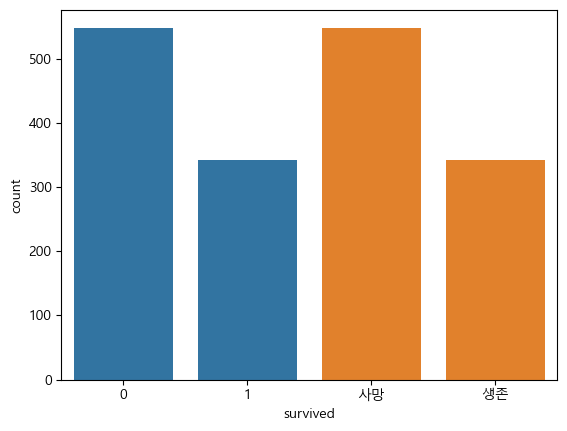

In [93]:
# countplot() 을 활용하면 카운트를 우리가 세지 않아도 시각화 가능하다.

df_result

sns.countplot(df_result, x='survived')

df_result

# 만약 0/1 이 아닌 사망/생존 으로 표현하고 싶다면 데이터프레임의 값을 수정해야 함
# 새로운 컬럼을 만들어서 사망/생존을 저장하자.

df_result['survived_kor'] = df_result['survived'].map({0:'사망', 1:'생존'}) # map: mapping 한다. (0과 '사망'을 연결하고, 1을 '생존'으로 연결)

sns.countplot(df_result, x='survived_kor')




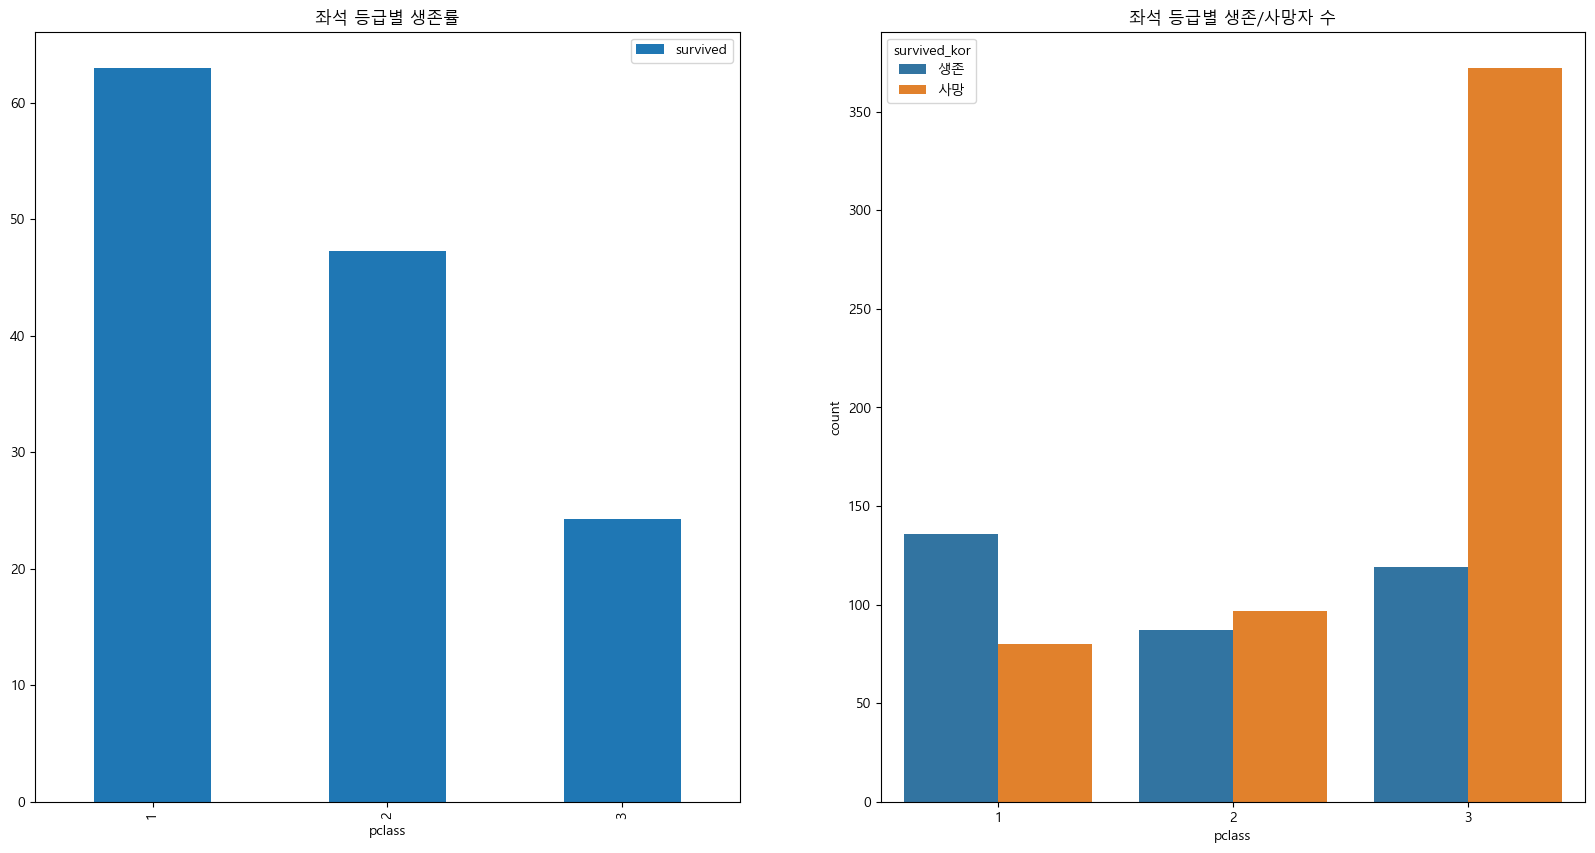

In [96]:
# 좌석 등급에 따른 생존률 시각화

# 좌석 등급은 총 3가지가 있다. (1, 2, 3)
df_result['pclass'].unique()

fig, ax = plt.subplots(1, 2, figsize = (20, 10))

# pclass와 survived칼럼만 가지는 데이터 프레임 생성
df_pclass = df_result[['pclass', 'survived']]
df_pclass

# 그룹화 함수: groupby -> 뭘 기준으로 그룹화 할건지 parameter  부분에 써줘야함
# 그룹화 함수 뒤에는 집계함수를 써줘야 그룹별로 집계된 값이 나옴 ex: count, sum, ..
# 0 / 1 로만 이루어진 데이터 -> 확률 구하기에 좋음

# groupby() : 특정 컬럼을 기준으로 그룹화를 시킨다.
# groupby() 다음에는 하나의 값을 구해주는 집계 함수를 사용해야 한다.
df_pclass.groupby('pclass').count()
df_pclass.groupby('pclass').sum()

# 사망: 0, 생존: 1 이므로 평균을 구하게 되면 각 집단(pclass: 좌석등급)별 생존률이 나온다.
df_pclass.groupby('pclass').mean() 

df_pclass.groupby('pclass').mean() * 100 # 데이터프레임 * 100 -> 산술연산 가능

(df_pclass.groupby('pclass').mean() * 100).plot.bar(ax=ax[0])

# 좌석 등급별 생존자/사망자 카운트를 시각화 한다.
sns.countplot(data=df_result, x='pclass', hue='survived_kor', ax=ax[1]) # hue: 그룹화를 해준다.

ax[0].set_title('좌석 등급별 생존률')
ax[1].set_title('좌석 등급별 생존/사망자 수')

plt.show()